Mean Squared Error: 25.816677977334514
Root Mean Squared Error (RMSE): 5.081011511238143
Mean Absolute Error (MAE): 3.626818613752071
R² (R-squared): 0.6998488215540706


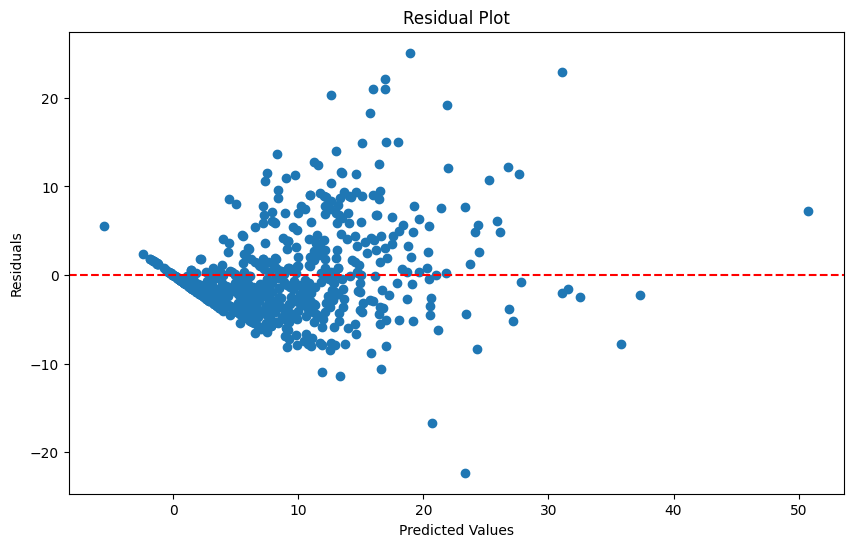

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


players_df = pd.read_csv('../../data/processed/lr_model2_training_testing_dataset.csv')
players_df.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df = players_df[players_df['Season'] != 2024].reset_index(drop=True)
testing_df = players_df[players_df['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train = training_df.drop(columns=['HR', 'Season'])
y_train = training_df['HR']

X_test = testing_df.drop(columns=['HR', 'Season'])
y_test = testing_df['HR']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test, y_pred)
print("R² (R-squared):", r2)

# Residuals (actual - predicted values)
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [5]:
X_train.insert(0, 'intercept', 1)
X_test.insert(0, 'intercept', 1)
sm_model = sm.OLS(y_train, X_train).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     897.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:17:55   Log-Likelihood:                -21778.
No. Observations:                7139   AIC:                         4.359e+04
Df Residuals:                    7120   BIC:                         4.373e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -8.6445      1.677     -5.155      0.000     -11.932      -5.357
season_factor     2.2153      0.405      5.467      0.000       1.421       3.010
tmFactor          7.1845      0.468     15.347      0.000       6.267       8.102
Age              -0.7877      0.840     -0.937      0.349      -2.435       0.860
3B                0.7713      0.051     14.996      0.000       0.670       0.872
IBB               1.1434      0.033     34.874      0.000       1.079       1.208
GDP               0.7524      0.016     47.409      0.000       0.721       0.783
BUH              -0.2433      0.060     -4.082      0.000      -0.360      -0.126
GB/FB            -0.3689      0.037     -9.941      0.000      -0.442      -0.296
IFFB%             1.1042      0.528      2.093      0.036       0.070       2.138
HR/FB            20.1386      0.672     29.975      0.000      18.822      21.456
IFH%              1.3177      0.719      1.833      0.067      -0.092       2.727
BUH%              1.3996      0.294      4.764      0.000       0.824       1.976
Spd              -0.1685      0.039     -4.318      0.000      -0.245      -0.092
EV               -0.0199      0.019     -1.063      0.288      -0.057       0.017
maxEV             0.0817      0.012      6.667      0.000       0.058       0.106
HardHit%          2.0731      0.559      3.706      0.000       0.976       3.170
Zone% (pi)       -2.9971      0.860     -3.486      0.000      -4.682      -1.312
Pace (pi)        -0.1292      0.027     -4.839      0.000      -0.182      -0.077
==============================================================================
Omnibus:                     1406.534   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8174.179
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       7.980   Cond. No.                     4.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
y_test_predictions = sm_model.predict(X_test)

r2 = r2_score(y_test, y_test_predictions)

print(f"R squared: {r2}")

R squared: 0.6998488215540686
